# Importando bibliotecas

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.style.use("seaborn")


# Criando um database dos arquivos dos exercícios

In [78]:
import shutil, os
import csv
from PIL import Image

exercicios = {}
users = []
for i in range (1,400):
    
    if i <10:
        user= "00"+ str(i)
    
    elif i<100:
        user= "0"+ str(i)
        
    else:
        user=str(i)
        

    path = 'backup/user_' + user
    
    users.append(path)
    
    
    data=[]
    for filename in os.listdir(path):
        data.append(filename)
        #writer.writerow(data)
        #########################
#         if "ch3_" in filename:
#             print(filename)
# #             os.mkdir('pasta')
#             f = path+'/'+filename

#             shutil.copy(f, 'pasta')
            
        #########################
    exercicios[int(user)]=data
    data=[]


In [79]:
dict={}
lista=[]
for k in exercicios.keys():
    exs={}
    for l in exercicios[k]:
            p=l.find('_')
            numero=int(l[2:p])          
            if numero not in exs:
                exs[numero] = 1
                lista.append(numero)
            else:
                exs[numero] += 1
    dict[k]=exs

In [80]:
from collections import OrderedDict 
dict1 = OrderedDict(sorted(dict.items())) 


In [81]:
dados = pd.DataFrame.from_dict(dict1) 


In [82]:
dados=dados.T

In [83]:
df = dados.reindex(columns=sorted(dados.columns))


In [84]:
df=df.fillna(0)


In [85]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,172,173,174,175,176,177,178,179,180,181
1,1.0,1.0,7.0,3.0,21.0,2.0,14.0,4.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,3.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,15.0,5.0,2.0,6.0,2.0,0.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,5.0,7.0,2.0,1.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise exploratória   - Quantos fizeram?

## Escreva o número do exercício:

In [86]:
numero_exercicio = 3

## Escreva o nome do exercício (mesmo da pasta no repositório)

In [87]:
nome_exercicio = "gaussiana"

In [88]:
exercicio3=df[numero_exercicio]
total = exercicio3.count()
naoFeito = exercicio3.isna().sum()
feito=total-naoFeito
naoFeito

0

In [89]:
tentativas_ex3 = exercicio3.value_counts()

total_tentativas=tentativas_ex3.sum()
naoFeitos_ex3 = tentativas_ex3[0]

feitos=total-naoFeitos_ex3
print(f"Porcentagem dos que fizeram: {(feitos/(total_tentativas))*100}%")

Porcentagem dos que fizeram: 79.9498746867168%


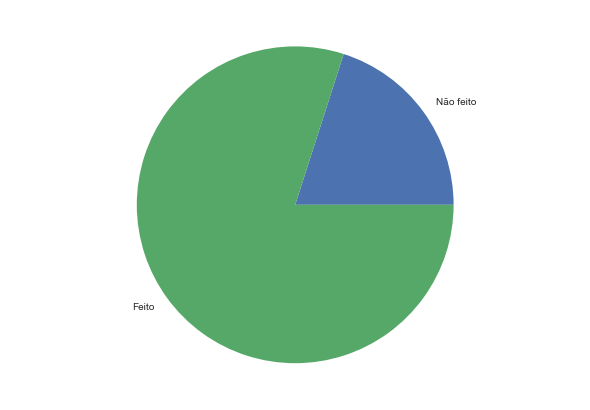

In [90]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie((naoFeitos_ex3,feitos), labels = ('Não feito', 'Feito'))
plt.show()

# Quantidade de tentativas

Text(0, 0.5, 'Alunos')

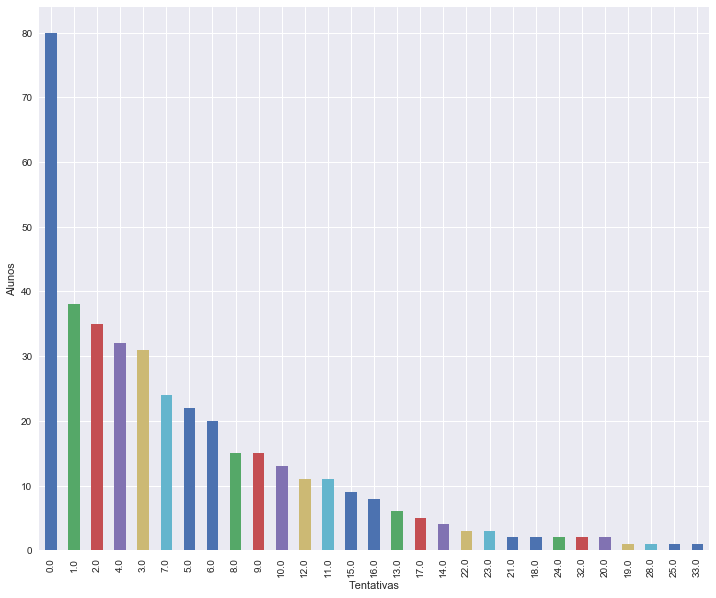

In [91]:
fig=plt.figure(figsize=(12,10))
tentativas_ex3.plot(kind='bar',  legend=False)
plt.xlabel('Tentativas')
plt.ylabel('Alunos')


## Média de tentativas

In [92]:
print(f"Média: {int(np.mean(tentativas_ex3))}")

Média: 13


# Analisando os erros

In [93]:
json_results= "exercicios/analise-exercicios/"+ nome_exercicio + "/resultado.json"
json_results

'exercicios/analise-exercicios/gaussiana/resultado.json'

In [94]:
df_exs = pd.read_json(json_results, orient='records')
df_exs = df_exs.rename(columns = {'id':'id','erros':'erros', 'resultado':'passou'})


In [95]:
#df_exs=df_exs.set_index('id')
df_exs.tail()

,erros,id,passou
5,"[test_1\nAssertionError:, test_2\nAssertionErr...",ch3_2019_03_08_01_23_06_233167.py,False
6,"[test_1\nAssertionError:, test_2\nAssertionErr...",ch3_2019_03_08_13_43_05_730833.py,False
7,[],ch3_2020_03_09_20_14_08_994855.py,True
8,[^\nIndentationError:],ch3_2019_03_08_01_26_08_960519.py,False
9,[^\nSyntaxError:],ch3_2020_09_09_20_18_58_431532.py,False


In [96]:
id = df_exs["id"]


In [97]:
r = df_exs["passou"]


In [98]:
df_erros=df_exs[df_exs['passou']==False]

df_erros.head()

,erros,id,passou
0,"[test_1\nAssertionError:, test_2\nAssertionErr...",ch3_2019_03_08_01_26_43_395614.py,False
1,"[test_1\nAssertionError:, test_2\nAssertionErr...",ch3_2019_03_08_01_25_09_975959.py,False
2,"[test_1\nAssertionError:, test_2\nAssertionErr...",ch3_2019_03_08_01_47_11_893854.py,False
4,[^\nSyntaxError:],ch3_2020_09_09_20_18_43_328377.py,False
5,"[test_1\nAssertionError:, test_2\nAssertionErr...",ch3_2019_03_08_01_23_06_233167.py,False


In [99]:
df_erros['erros'] = [''.join(map(str, l)) for l in df_erros['erros']]
df_erros.head()


,erros,id,passou
0,test_1\nAssertionError:test_2\nAssertionError:...,ch3_2019_03_08_01_26_43_395614.py,False
1,test_1\nAssertionError:test_2\nAssertionError:...,ch3_2019_03_08_01_25_09_975959.py,False
2,test_1\nAssertionError:test_2\nAssertionError:...,ch3_2019_03_08_01_47_11_893854.py,False
4,^\nSyntaxError:,ch3_2020_09_09_20_18_43_328377.py,False
5,test_1\nAssertionError:test_2\nAssertionError:...,ch3_2019_03_08_01_23_06_233167.py,False


In [100]:
num = [0,1,2,3,4,5,6,7,8,9]
for ind in df_erros.index: 
    erro = "AssertionError:"
    for n in num:
        if str(n) in df_erros["erros"][ind]:
            erro+=(str(n)+"/")
    if (erro !=  ("AssertionError:")):
        df_erros["erros"][ind] = erro
    
    elif  "SyntaxError" in df_erros["erros"][ind]:
        df_erros["erros"][ind] = "SyntaxError"
    
    elif "IndentationError" in df_erros["erros"][ind]:
        df_erros["erros"][ind] = "IndentationError"

            
            
df_erros.head()           

,erros,id,passou
0,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_26_43_395614.py,False
1,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_25_09_975959.py,False
2,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_47_11_893854.py,False
4,SyntaxError,ch3_2020_09_09_20_18_43_328377.py,False
5,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_23_06_233167.py,False


In [101]:
erros_count = df_erros["erros"].value_counts()

[Text(0, 0, 'AssertionError'),
 Text(0, 0, 'SyntaxError'),
 Text(0, 0, 'IndentationError')]

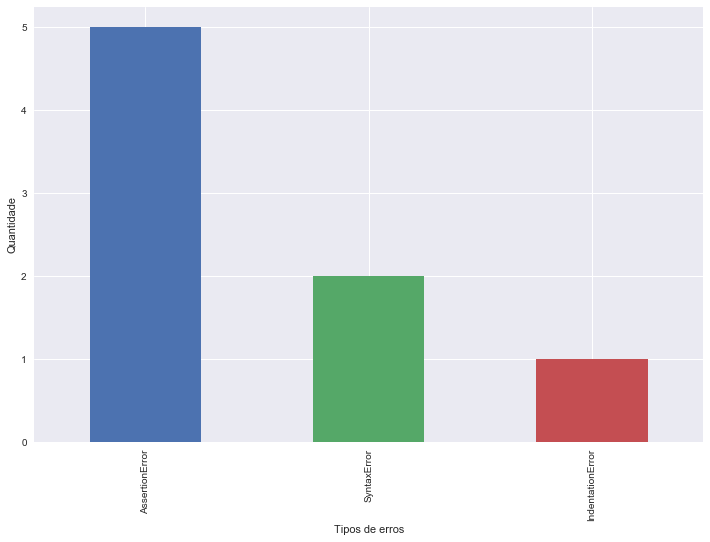

In [102]:
plt.figure(figsize=(12, 8))
ax = erros_count.plot(kind='bar')
plt.xlabel('Tipos de erros')
plt.ylabel('Quantidade')
x_labels = ["AssertionError", "SyntaxError", "IndentationError"]
#ax.legend(x_labels)
ax.set_xticklabels(x_labels)

## Adicionando os IDs dos usuários ao dataframe

In [103]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [104]:
dir = r"C:\Users\gabic\Documents\NINJA_DeSoft\submissoes_servidor\backup"
files = list_files(dir)

In [105]:
lista_files = []
for f in files:
    f = f[65:]
    f.replace("//","/")
    lista_files.append(f)
    
lista_files= lista_files[1:]

In [106]:
df_erros["usuario"]="0"


In [107]:
 for ind in df_erros.index: 
        for l in lista_files:
            user = l[0:8]
            ex = l[9:]
            if ex == df_erros["id"][ind]:
                df_erros["usuario"][ind] = user
#                 print(user)
#                 print(ex)


In [108]:
df_erros.head()

,erros,id,passou,usuario
0,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_26_43_395614.py,False,user_001
1,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_25_09_975959.py,False,user_001
2,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_47_11_893854.py,False,user_001
4,SyntaxError,ch3_2020_09_09_20_18_43_328377.py,False,user_003
5,AssertionError:1/2/5/6/7/,ch3_2019_03_08_01_23_06_233167.py,False,user_001


In [109]:
users_count = df_erros["usuario"].value_counts()
users_count

user_001    6
user_003    2
Name: usuario, dtype: int64

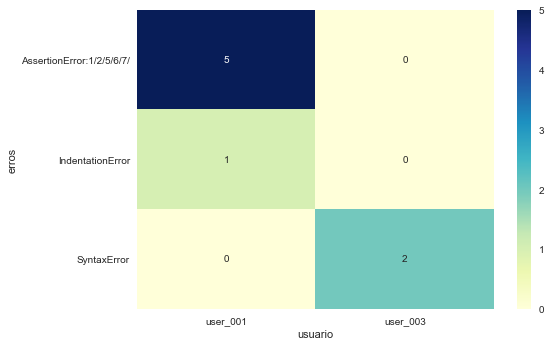

In [110]:
erros = df_erros["erros"]
users = df_erros["usuario"]
table = pd.crosstab(erros, users)
plot=sns.heatmap(table, annot=True, cmap="YlGnBu")